In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pickle

In [2]:
dataframe=pd.read_csv("Final Data.csv")
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,True_Diesel,True_Petrol,True_Individual,True_Manual,True_1,True_3
0,4,2014,3.35,5.59,27000,0,1,0,1,0,0
1,6,2013,4.75,9.54,43000,1,0,0,1,0,0
2,9,2017,7.25,9.85,6900,0,1,0,1,0,0
3,4,2011,2.85,4.15,5200,0,1,0,1,0,0
4,5,2014,4.60,6.87,42450,1,0,0,1,0,0


## Dividing The data into Train and Test set

In [20]:
x=dataframe.drop("Selling_Price",axis=True)
y=dataframe["Selling_Price"]
x_train,x_test,y_train,y_test=train_test_splict=train_test_split(x,y,test_size=0.2,random_state=10)

### Feature importance 

In [4]:
model=ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([2.34279173e-02, 7.32071771e-02, 3.44423676e-01, 3.81231137e-02,
       2.30194350e-01, 1.30290397e-02, 1.36012064e-01, 1.41299472e-01,
       1.96101586e-04, 8.70886890e-05])

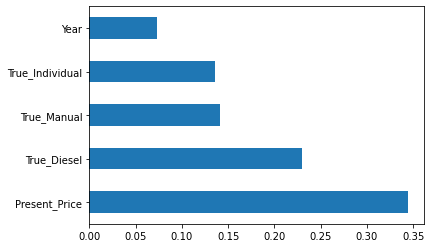

In [5]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Model Building

In [6]:
random_forest=RandomForestRegressor()

In [7]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [8]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [11]:
model=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,n_iter=10, n_jobs=1,cv=5,verbose=2,random_state=40)

In [30]:
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.9s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.8s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   53.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, verbose=2)

In [32]:
model.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [34]:
model.best_score_

0.8569432826443654

In [36]:
predict=model.predict(x_test)

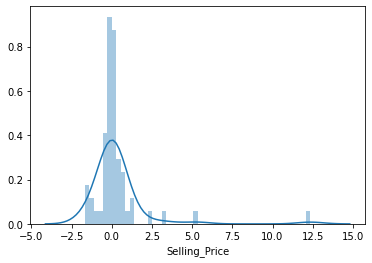

In [40]:
sns.distplot(y_test-predict)

In [44]:

print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 0.7547928474718154
MSE: 3.5658619150133597
RMSE: 1.8883489918480005


In [24]:
model.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.0s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.8s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.9s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, verbose=2)

In [25]:
pickle.dump(random_forest,open('random_forest_regression_model-2.pkl','wb'))